In [190]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.models import load_model
from PIL import  Image
from keras_preprocessing.image import img_to_array
from keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, AveragePooling2D,MaxPooling2D
import os
import heapq

## Read the clean and corrected WiFi data

In [2]:
database = pd.read_pickle('E:/CESI/data.pkl')

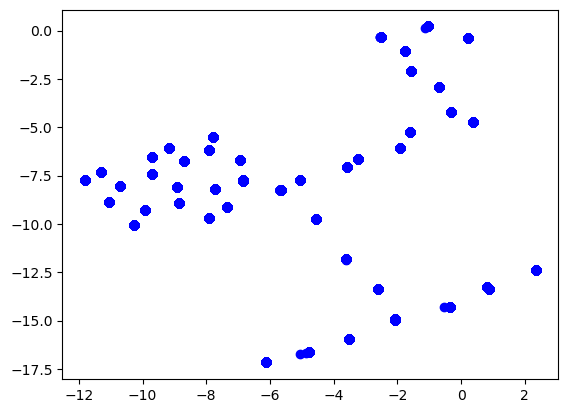

In [3]:
plt.scatter(database['Position'].apply(lambda x: x[0]),database['Position'].apply(lambda x: x[1]),c='b')

In [4]:
database = database.reset_index().drop(columns=['index'])

In [5]:
database

,Position,Position No.,Address: 34:15:93:9C:D0:E0,Address: 34:15:93:5C:DE:C0,Address: 34:15:93:5C:DE:C1,Address: 34:15:93:5C:AB:90,Address: 34:15:93:5C:AB:91,Address: 34:15:93:5C:B0:60,Address: 34:15:93:5C:7F:70,Address: 34:15:93:5C:B0:61,...,Address: 34:15:93:9C:C0:01,Address: 34:15:93:5C:D3:20,Address: 34:15:93:9C:FA:A1,Address: 34:15:93:9C:FA:A0,Label,Unified Position,Address: 3A:F6:E5:83:01:CE,Address: 1A:9C:69:C0:AC:CE,Address: 34:15:93:9C:CA:10,Address: 34:15:93:9C:CA:11
0,"[-6.115268348039076, -17.166151174963574, -74....",0,51.0,47.0,48.0,46.0,47.0,46.0,31.0,47.0,...,0.0,0.0,0.0,0.0,0,"[-18.163594106546658, 1.4634291324068953, -74....",0.0,0.0,0.0,0.0
1,"[-6.115268348039076, -17.166151174963574, -74....",0,56.0,41.0,41.0,56.0,55.0,47.0,31.0,47.0,...,0.0,0.0,0.0,0.0,0,"[-18.163594106546658, 1.4634291324068953, -74....",0.0,0.0,0.0,0.0
2,"[-6.115268348039076, -17.166151174963574, -74....",0,51.0,46.0,45.0,50.0,49.0,49.0,31.0,49.0,...,0.0,0.0,0.0,0.0,0,"[-18.163594106546658, 1.4634291324068953, -74....",0.0,0.0,0.0,0.0
3,"[-6.115268348039076, -17.166151174963574, -74....",0,51.0,52.0,52.0,54.0,55.0,47.0,29.0,47.0,...,0.0,0.0,0.0,0.0,0,"[-18.163594106546658, 1.4634291324068953, -74....",0.0,0.0,0.0,0.0
4,"[-6.115268348039076, -17.166151174963574, -74....",0,51.0,44.0,43.0,48.0,48.0,47.0,29.0,48.0,...,0.0,0.0,0.0,0.0,0,"[-18.163594106546658, 1.4634291324068953, -74....",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42785,"[-9.920365418113523, -9.256582613473547, 122.5...",s35,38.0,29.0,33.0,35.0,35.0,40.0,33.0,41.0,...,22.0,24.0,0.0,0.0,42,"[-9.920731341502751, -9.254678229090137, 122.3...",0.0,0.0,0.0,0.0
42786,"[-9.920365418113523, -9.256582613473547, 122.5...",s35,47.0,30.0,30.0,32.0,34.0,41.0,36.0,42.0,...,22.0,24.0,0.0,0.0,42,"[-9.920731341502751, -9.254678229090137, 122.3...",0.0,0.0,0.0,0.0
42787,"[-9.920365418113523, -9.256582613473547, 122.5...",s35,38.0,33.0,32.0,36.0,34.0,40.0,30.0,41.0,...,20.0,24.0,0.0,0.0,42,"[-9.920731341502751, -9.254678229090137, 122.3...",0.0,0.0,0.0,0.0
42788,"[-9.920365418113523, -9.256582613473547, 122.5...",s35,48.0,30.0,31.0,33.0,34.0,42.0,35.0,42.0,...,20.0,24.0,0.0,0.0,42,"[-9.920731341502751, -9.254678229090137, 122.3...",0.0,0.0,0.0,0.0


In [6]:
database[database.Label==25]

,Position,Position No.,Address: 34:15:93:9C:D0:E0,Address: 34:15:93:5C:DE:C0,Address: 34:15:93:5C:DE:C1,Address: 34:15:93:5C:AB:90,Address: 34:15:93:5C:AB:91,Address: 34:15:93:5C:B0:60,Address: 34:15:93:5C:7F:70,Address: 34:15:93:5C:B0:61,...,Address: 34:15:93:9C:C0:01,Address: 34:15:93:5C:D3:20,Address: 34:15:93:9C:FA:A1,Address: 34:15:93:9C:FA:A0,Label,Unified Position,Address: 3A:F6:E5:83:01:CE,Address: 1A:9C:69:C0:AC:CE,Address: 34:15:93:9C:CA:10,Address: 34:15:93:9C:CA:11
24910,"[-1.1368471491877252, 0.16122163378768706, -16...",s0,21.0,39.0,39.0,24.0,23.0,46.0,48.0,46.0,...,0.0,30.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
24911,"[-1.0271717141603762, 0.21702070923013528, -16...",s0,19.0,43.0,44.0,22.0,23.0,49.0,58.0,50.0,...,0.0,29.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
24912,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,20.0,39.0,39.0,22.0,23.0,46.0,44.0,47.0,...,0.0,29.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
24913,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,20.0,42.0,51.0,23.0,23.0,48.0,58.0,50.0,...,0.0,28.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
24914,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,21.0,39.0,39.0,24.0,23.0,46.0,50.0,46.0,...,0.0,28.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25905,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,22.0,36.0,36.0,23.0,24.0,50.0,51.0,52.0,...,0.0,38.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
25906,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,21.0,42.0,42.0,23.0,24.0,43.0,61.0,44.0,...,0.0,38.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
25907,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,20.0,36.0,36.0,23.0,22.0,49.0,50.0,50.0,...,0.0,37.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0
25908,"[-1.0271717141603762, 0.21702070923013506, -16...",s0,20.0,40.0,41.0,22.0,22.0,40.0,60.0,41.0,...,0.0,31.0,0.0,0.0,25,"[-1.0266557954517133, 0.2161868446997775, -169...",0.0,0.0,0.0,0.0


In [7]:
database=database.fillna(0)

In [8]:
col=list(database.columns)
col.remove('Unified Position')
col.remove('Label')
col.remove('Position')
col.remove('Position No.')

X = database[col]
Xt = X.copy()

y = database['Label']
yt = y.copy()

# Normalization

In [9]:

for col in X.columns:

            if Xt[col].std() !=0:
                X[col]=(X[col]-Xt[col].mean())/(Xt[col].std())
            else:
                X[col]= 0.0


C:\Users\user\AppData\Local\Temp\ipykernel_19344\1978441057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=(X[col]-Xt[col].mean())/(Xt[col].std())


In [10]:
X

,Address: 34:15:93:9C:D0:E0,Address: 34:15:93:5C:DE:C0,Address: 34:15:93:5C:DE:C1,Address: 34:15:93:5C:AB:90,Address: 34:15:93:5C:AB:91,Address: 34:15:93:5C:B0:60,Address: 34:15:93:5C:7F:70,Address: 34:15:93:5C:B0:61,Address: 34:15:93:5C:7F:71,Address: 34:15:93:5C:8B:61,...,Address: 34:15:93:5C:D3:21,Address: 34:15:93:9C:C0:00,Address: 34:15:93:9C:C0:01,Address: 34:15:93:5C:D3:20,Address: 34:15:93:9C:FA:A1,Address: 34:15:93:9C:FA:A0,Address: 3A:F6:E5:83:01:CE,Address: 1A:9C:69:C0:AC:CE,Address: 34:15:93:9C:CA:10,Address: 34:15:93:9C:CA:11
0,0.756609,0.567127,0.636610,0.905100,0.959158,-0.069462,-0.529208,0.044339,-0.500038,-0.612921,...,-0.720435,-1.480867,-1.476586,-0.730943,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
1,1.216211,-0.014392,-0.000851,1.566911,1.463038,0.051034,-0.529208,0.044339,-0.500038,-0.259112,...,-0.720435,-1.480867,-1.476586,-0.730943,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
2,0.756609,0.470207,0.363413,1.169824,1.085128,0.292027,-0.529208,0.278498,-0.500038,-0.259112,...,-0.720435,-1.480867,-1.476586,-0.730943,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
3,0.756609,1.051727,1.000874,1.434548,1.463038,0.051034,-0.685602,0.044339,-0.500038,0.006245,...,-0.720435,-1.480867,-1.476586,-0.730943,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
4,0.756609,0.276368,0.181281,1.037462,1.022143,0.051034,-0.685602,0.161419,-0.500038,0.006245,...,-0.720435,-1.480867,-1.476586,-0.730943,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42785,-0.438357,-1.177430,-0.729379,0.177108,0.203338,-0.792440,-0.372815,-0.658138,-0.274189,0.271601,...,0.959059,0.436352,0.633681,1.021526,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
42786,0.388927,-1.080510,-1.002577,-0.021435,0.140353,-0.671944,-0.138225,-0.541058,-0.198906,0.183149,...,0.959059,0.436352,0.633681,1.021526,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
42787,-0.438357,-0.789751,-0.820445,0.243289,0.140353,-0.792440,-0.607405,-0.658138,-0.500038,0.271601,...,1.105102,0.436352,0.441838,1.021526,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452
42788,0.480848,-1.080510,-0.911511,0.044746,0.140353,-0.551447,-0.216421,-0.541058,-0.123623,0.271601,...,1.105102,0.436352,0.441838,1.021526,-0.345236,-0.353734,-0.017419,-0.009668,-0.04103,-0.036452


# 10 WiFi samples are taken for a localization 

In [11]:
memori = 10

# The WiFi data for a localization is 10 x 58

In [12]:
X = np.array(X).reshape(-1,memori,X.shape[1],1)
y = np.array(y).reshape(-1,memori,1).mean(axis = 1).astype(int)

# Check the data for Label =1  (last 30%)

In [13]:
np.where(y[:,0]==1)[0][69::]

array([169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198], dtype=int64)

# Check the data for Label =1  (first 70%)

In [14]:
np.where(y[:,0]==1)[0][0:-30]

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168], dtype=int64)

# The 10 x 58 WiFi data is cyclicly filled into a 58 x 58 matrix

In [15]:
X_e = np.zeros([X.shape[0],58,58,1])
for k, x in enumerate(X):
        for kk in range(5):    
            X_e[k,memori*kk:memori*(kk+1),0:X.shape[2],0]  = x[:,:,0]
            
        X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0]           
 

# Calculate the spatial correlation matrix

In [16]:

X_covar = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],1])
for k, x in enumerate(X_e):
    X_covar[k,:,:,0]  = x[:,:,0].T@x[:,:,0]
    X_covar[k,:,:,0] = (X_covar[k,:,:,0]-X_covar[k,:,:,0].min())*255/(X_covar[k,:,:,0].max()-X_covar[k,:,:,0].min())

# Calculate the FFT spectrum

In [17]:
X_fft = np.zeros([X_e.shape[0],X_e.shape[1],X_e.shape[2],2])

for k, x in enumerate(X_e):

        f = np.fft.fft2(x[:,:,0])
        fshift = np.fft.fftshift(f)

        X_fft[k,:,:,0] = (np.real(fshift)-np.real(fshift).min())*255/(np.real(fshift).max()-np.real(fshift).min())
        X_fft[k,:,:,1] = (np.imag(fshift)-np.imag(fshift).min())*255/(np.imag(fshift).max()-np.imag(fshift).min())

# Preserve the RSSI information

In [18]:
# RSSI image
Xt = np.array(Xt).reshape(-1,memori,Xt.shape[1],1)*255/70
for k, x in enumerate(Xt):
        for kk in range(5):
            X_e[k,memori*kk:memori*(kk+1),0:Xt.shape[2],0]  = x[:,:,0]
        X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0]           

# Visualization of RSSI

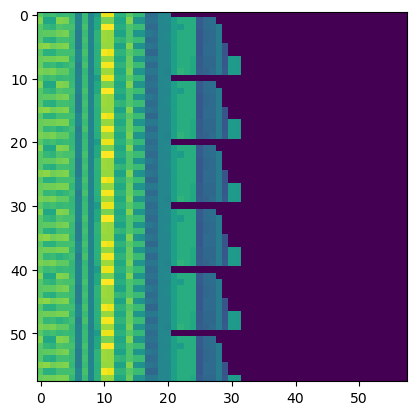

In [19]:
plt.imshow(X_e[0,:,:,0])

# Visualization of spectrum (real part)

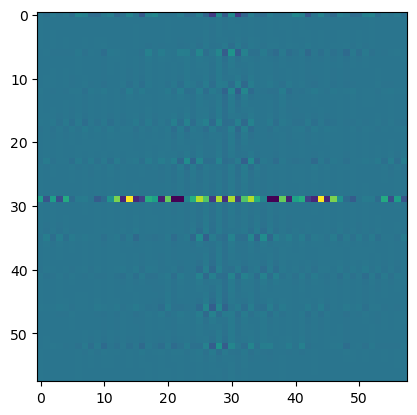

In [20]:
plt.imshow(X_fft[0,:,:,0])

# Visualization of spectrum (imaginary part)

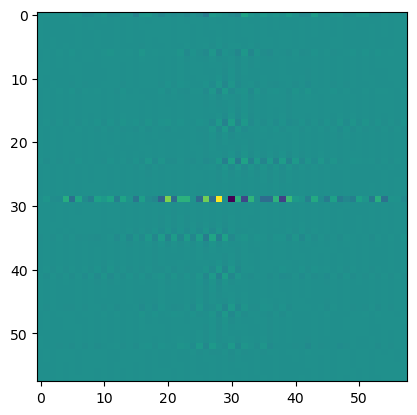

In [21]:
plt.imshow(X_fft[0,:,:,1])

# Visualization of correlations

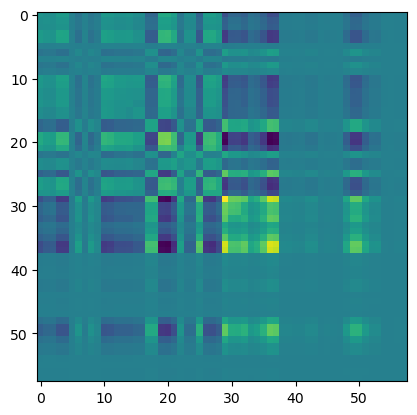

In [22]:
plt.imshow(X_covar[0])

In [23]:
X_covar[10].max()

255.0

In [24]:
X_covar[0].min()

0.0

# Creating a tensor to integrate all these features

In [25]:
XX = np.zeros([X.shape[0],58,58,4])
XX[:,0:X_e.shape[1],0:X_e.shape[2],0] =  X_e[:,:,:,0]
XX[:,0:X_e.shape[1],0:X_e.shape[2],1:3] =  X_fft
XX[:,0:X_e.shape[1],0:X_e.shape[2],3] =  X_covar[:,:,:,0]

# Normalization

In [26]:
XX = XX/255

In [27]:
np.where(y[:,0]==1)[0][0:-30]

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168], dtype=int64)

In [28]:
def batch_sampling(XX): 


                X_train = []
                y_train = []
                
                X_test = []
                y_test = []


                for k in np.unique(y):

                                        
                                        for k_train in np.where(y[:,0]==k)[0][0:-30]:
                                       
                                                      X_train.append(np.float32(XX[k_train,:,:,:]))
                                                      y_train.append(k)
                                        
                                        for k_test in np.where(y[:,0]==k)[0][69::]:
                                                      X_test.append(np.float32(XX[k_test,:,:,:]))
                                                      y_test.append(k)
                                        
                                        
                                        
                return X_train, y_train, X_test, y_test

In [29]:
X_train, y_train, X_test, y_test = batch_sampling(XX)

In [30]:
X_train[0].shape

(58, 58, 4)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [32]:
X_train.shape

(2989, 58, 58, 4)

In [33]:
X_train,y_train = shuffle(X_train,y_train)

In [34]:
num_class = len(np.unique(y))

In [35]:
y_train = np_utils.to_categorical(y_train,num_classes=num_class)
y_test = np_utils.to_categorical(y_test,num_classes=num_class)

In [36]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_class, activation='softmax')) # 10个类别的softmax分类器

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

# Entraîner le modèle

Error_distance = []
Train_Loss= []
Train_Acc=[]
Test_Loss= []
Test_Acc=[]

for k in range(15):
    print('epoch:',k)
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=1, batch_size=100,  verbose=1)
    
    
    
    Train_Loss.append(history.history['loss'])
    Train_Acc.append(history.history['accuracy'])


    Test_Loss.append(history.history['val_loss'])
    Test_Acc.append(history.history['val_accuracy'])
    
    
    
    y_pred=model.predict(X_test)

    yy_pred=[]
    for yy in y_pred:
        yy_pred.append(np.where(yy==yy.max())[0][0])

    yy_test=[]
    for yy in y_test:
        yy_test.append(np.where(yy==yy.max())[0][0])

    position_pred = []
    for yy in yy_pred:
        position_pred.append(database[database['Label']==yy]['Position'].iloc[0][0:2])

    position_test = []
    for yy in yy_test:
        position_test.append(database[database['Label']==yy]['Position'].iloc[0][0:2])

    error_distance = np.sqrt(((np.array(position_pred) - np.array(position_test))**2).sum()/len(yy_test))
    print('Errorr distance',error_distance)
    Error_distance.append(error_distance)
    
    
    


epoch: 0
41/41 [==============================] - 0s 5ms/step
Errorr distance 1.9909663260543766
epoch: 1
41/41 [==============================] - 0s 4ms/step
Errorr distance 1.4744429889928805
epoch: 2
41/41 [==============================] - 0s 5ms/step
Errorr distance 1.3306288809272369
epoch: 3
41/41 [==============================] - 0s 3ms/step
Errorr distance 1.046022079024412
epoch: 4
41/41 [==============================] - 0s 3ms/step
Errorr distance 0.869134955452665
epoch: 5
41/41 [==============================] - 0s 4ms/step
Errorr distance 0.7511991736388707
epoch: 6
41/41 [==============================] - 0s 4ms/step
Errorr distance 0.6832322635784305
epoch: 7
41/41 [==============================] - 0s 4ms/step
Errorr distance 0.6506012039198493
epoch: 8
41/41 [==============================] - 0s 5ms/step
Errorr distance 0.6954731511863267
epoch: 9
41/41 [==============================] - 0s 5ms/step
Errorr distance 0.604742546546464
epoch: 10
41/41 [================

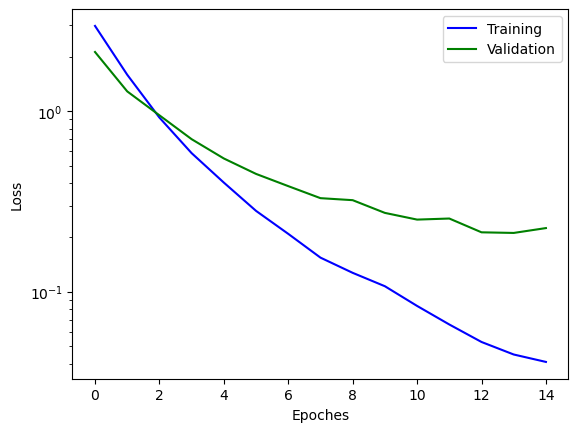

In [37]:
epochs=range(len(history.history['loss']))
plt.figure()
plt.semilogy(Train_Loss,'b',label='Training loss')
plt.semilogy(Test_Loss,'g',label='val loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

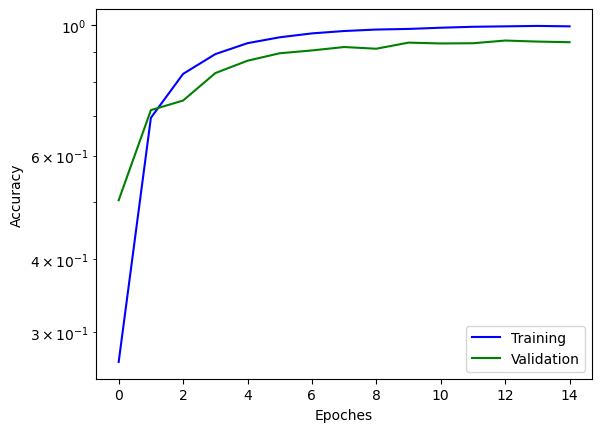

In [38]:
plt.figure()
plt.semilogy(Train_Acc,'b',label='Training loss')
plt.semilogy(Test_Acc,'g',label='val loss')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'])

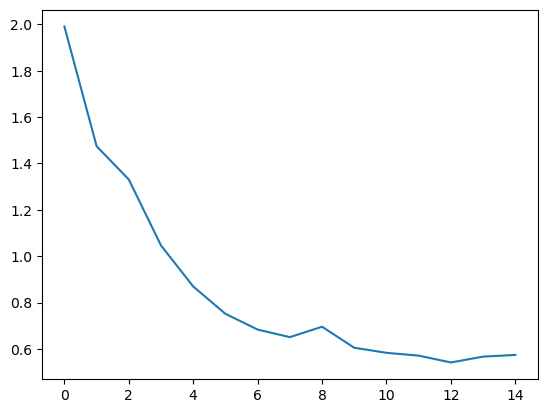

In [39]:
plt.plot(Error_distance)

# Offline test

In [40]:
#folder_path = "C:/Users\yding/OneDrive/CESI/work/Recherche/robotique/publication/IEEE Humanoide 2024/Python code/Fig10-11/test_database/"
  
    
folder_path = "E:/CESI/test_database/"    
    
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

time_stamp = []

for fn in file_names:
    if len(fn)>10:
        time_stamp.append(fn[0:14])
        
time_stamp = np.unique(time_stamp) 

sample_list =[]
for ts in time_stamp:
    sample = {}
    for fn in file_names:
        if fn[0:21] == ts+'-image1':
            sample['image1'] = fn
            
        if fn[0:21] == ts+'-image2':
            sample['image2'] = fn
            
        if fn[0:21] == ts+'-image3':
            sample['image3'] = fn
            
        if fn[0:21] == ts+'-image4':
            sample['image4'] = fn
            
        if fn[0:19] == ts+'-wifi':
            sample['wifi'] = fn
            sample['position'] = fn[20:-4]
    sample_list.append(sample)         
            
            
test_dataset = pd.DataFrame(sample_list) 
test_dataset['position'] = test_dataset['position'].apply(lambda x: np.array(re.findall(r"[-+]?\d+\.?\d*[eE]?[-+]?\d*", x)))
test_dataset['position'] = test_dataset['position'].apply(lambda x:np.array([float(x[0]),float(x[1])]))

Table = {}
for label in database['Label'].unique():
       Table[label] = database[database['Label']==label]['Position'].iloc[0][0:2]
        
test_dataset['Label'] = test_dataset['position'].apply(lambda x: np.argmin(((x-np.array(list(Table.values())))**2).sum(axis=1)))

In [41]:
result_list = []
row = 58
colu = 58
memori = 10
covar = True
fft = True

for kkk in range(test_dataset.shape[0]):
            print(test_dataset.iloc[kkk])
        
            result = {}   
        
        
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image1'])
            img = img.resize((row, colu))#重构图像大小
            Xi = img_to_array(img)/255
            Xi = Xi.reshape(-1, row, colu, 3)
            Xi= Xi.astype('float32')     
            
 
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image2'])
            img = img.resize((row, colu))#重构图像大小
            Xi1 = img_to_array(img)/255
            Xi1 = Xi1.reshape(-1, row, colu, 3)
            Xi1= Xi1.astype('float32')
            
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image3'])
            img = img.resize((row, colu))#重构图像大小
            Xi2 = img_to_array(img)/255
            Xi2 = Xi2.reshape(-1, row, colu, 3)
            Xi2 = Xi2.astype('float32')
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image4'])
            img = img.resize((row, colu))#重构图像大小
            Xi3 = img_to_array(img)/255
            Xi3 = Xi3.reshape(-1, row, colu, 3)
            Xi3 = Xi3.astype('float32')
            
            
            sample = pd.read_pickle(folder_path+test_dataset.iloc[kkk]['wifi'])
############################################################################################################
            X = np.array(sample).reshape(-1,memori,sample.shape[1],1)
##############

            X_e = np.zeros([X.shape[0],58,58,1])
            for k, x in enumerate(X):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:X.shape[2],0]  = x[:,:,0]


                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 
###################
            if covar == True:
                    X_covar = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],1])
                    for k, x in enumerate(X_e):
                        X_covar[k,:,:,0]  = x[:,:,0].T@x[:,:,0]
                        X_covar[k,:,:,0] = (X_covar[k,:,:,0]-X_covar[k,:,:,0].min())*255/(X_covar[k,:,:,0].max()-X_covar[k,:,:,0].min())


            if fft == True:
                X_fft = np.zeros([X_e.shape[0],X_e.shape[1],X_e.shape[2],2])

                for k, x in enumerate(X_e):

                        f = np.fft.fft2(x[:,:,0])
                        fshift = np.fft.fftshift(f)

                                
                        X_fft[k,:,:,0] = (np.real(fshift)-np.real(fshift).min())*255/(np.real(fshift).max()-np.real(fshift).min())
                        X_fft[k,:,:,1] = (np.imag(fshift)-np.imag(fshift).min())*255/(np.imag(fshift).max()-np.imag(fshift).min())

##########################################
     
#####################################################
# RSSI image

            for c in sample.columns:
                 sample[c] = sample[c]*database[c].std()+database[c].mean() 

            Xt = np.array(sample).reshape(-1,memori,sample.shape[1],1)*255/70       

            #Xt = np.array(Xt).reshape(-1,memori,Xt.shape[1],1)*255/70
            for k, x in enumerate(Xt):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:Xt.shape[2],0]  = x[:,:,0]

                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 

#####################################################

            XX = np.zeros([X.shape[0],58,58,4])
            XX[:,0:X_e.shape[1],0:X_e.shape[2],0] = X_e[:,:,:,0]
            XX[:,0:X_e.shape[1],0:X_e.shape[2],1:3] =  X_fft            
            XX[:,0:X_e.shape[1],0:X_e.shape[2],3] =  X_covar[:,:,:,0]

                
            X_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],16])
            X_all[:,:,:,0:4]  = XX
            X_all[:,:,:,4:7] = Xi
            X_all[:,:,:,7:10] = Xi1
            X_all[:,:,:,10:13] = Xi2
            X_all[:,:,:,13::] = Xi3
            
          

            
            X_wifi_image =  X_all
            X_wifi =  X_all[:,:,:,0:4]
            
            
            
            XX_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],12])
            XX_all[:,:,:,0:3]  = Xi
            XX_all[:,:,:,3:6]  = Xi1
            XX_all[:,:,:,6:9]  = Xi2
            XX_all[:,:,:,9::]  = Xi3
            
            X_image =  XX_all
############################################################################################################            
            print('Computing')
            y_pred=model.predict(X_wifi/255)
####################################################################### 
            
     
            result = {}
            
            result['Method'] = 'WiFi-Image'
            
            result['Pred_label'] = np.where(y_pred[0]==y_pred[0].max())[0][0]
            
            result['Pred_position'] = database[database['Label']==np.where(y_pred[0]==y_pred[0].max())[0][0]]['Position'].iloc[0][0:2]

            result['True_label'] = test_dataset.iloc[kkk]['Label']
            
            result['True_position'] = test_dataset.iloc[kkk]['position']
            
            result['Error distance'] = np.sqrt(((np.array(result['Pred_position']) - np.array(result['True_position']))**2).sum())
            
            result_list.append(result)         

result_list = pd.DataFrame(result_list) 

image1      20240930152712-image1-[-0.17733072 -0.63474969...
image2      20240930152712-image2-[-0.17733072 -0.63474969...
image3      20240930152712-image3-[-0.17733072 -0.63474969...
image4      20240930152712-image4-[-0.17733072 -0.63474969...
wifi        20240930152712-wifi-[-0.17733072 -0.63474969 5...
position                           [-0.17733072, -0.63474969]
Label                                                      12
Name: 0, dtype: object
Computing
1/1 [==============================] - 0s 94ms/step
image1      20240930153053-image1-[-0.22739151 -0.62798392...
image2      20240930153053-image2-[-0.22739151 -0.62798392...
image3      20240930153053-image3-[-0.22739151 -0.62798392...
image4      20240930153053-image4-[-0.22739151 -0.62798392...
wifi        20240930153053-wifi-[-0.22739151 -0.62798392 8...
position                           [-0.22739151, -0.62798392]
Label                                                      12
Name: 1, dtype: object
Computing
1/1 [=========

Computing
1/1 [==============================] - 0s 33ms/step
image1      20240930163235-image1-[-1.39408023 -4.97443535...
image2      20240930163235-image2-[-1.39408023 -4.97443535...
image3      20240930163235-image3-[-1.39408023 -4.97443535...
image4      20240930163235-image4-[-1.39408023 -4.97443535...
wifi        20240930163235-wifi-[-1.39408023 -4.97443535 1...
position                           [-1.39408023, -4.97443535]
Label                                                      29
Name: 16, dtype: object
Computing
1/1 [==============================] - 0s 31ms/step
image1      20240930163523-image1-[  -2.80235044   -6.4488...
image2      20240930163523-image2-[  -2.80235044   -6.4488...
image3      20240930163523-image3-[  -2.80235044   -6.4488...
image4      20240930163523-image4-[  -2.80235044   -6.4488...
wifi        20240930163523-wifi-[  -2.80235044   -6.448832...
position                           [-2.80235044, -6.44883286]
Label                                         

1/1 [==============================] - 0s 16ms/step
image1      20240930172308-image1-[ -2.00582494 -14.761394...
image2      20240930172308-image2-[ -2.00582494 -14.761394...
image3      20240930172308-image3-[ -2.00582494 -14.761394...
image4      20240930172308-image4-[ -2.00582494 -14.761394...
wifi        20240930172308-wifi-[ -2.00582494 -14.76139446...
position                          [-2.00582494, -14.76139446]
Label                                                       3
Name: 32, dtype: object
Computing
1/1 [==============================] - 0s 31ms/step
image1      20240930172833-image1-[  -7.46002893   -6.8853...
image2      20240930172833-image2-[  -7.46002893   -6.8853...
image3      20240930172833-image3-[  -7.46002893   -6.8853...
image4      20240930172833-image4-[  -7.46002893   -6.8853...
wifi        20240930172833-wifi-[  -7.46002893   -6.885383...
position                           [-7.46002893, -6.88538319]
Label                                                   

In [42]:
np.sqrt((result_list['Error distance']**2).mean())

2.3381926964249202

In [43]:
result_list['Error distance'].mean()

1.9026367587553987

In [44]:
(result_list['True_label'] == result_list['Pred_label']).sum()/len(result_list)

0.29411764705882354

In [45]:
if np.sqrt((result_list['Error distance']**2).mean()) < 2.338:
     model.save('WiFi_5858.keras')

# Reload le model to verify the results.

In [46]:
result_list = []
row = 58
colu = 58
memori = 10
covar = True
fft = True


for kkk in range(test_dataset.shape[0]):
            print(test_dataset.iloc[kkk])
        
            result = {}   
        
        
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image1'])
            img = img.resize((row, colu))#重构图像大小
            Xi = img_to_array(img)/255
            Xi = Xi.reshape(-1, row, colu, 3)
            Xi= Xi.astype('float32')     
            
 
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image2'])
            img = img.resize((row, colu))#重构图像大小
            Xi1 = img_to_array(img)/255
            Xi1 = Xi1.reshape(-1, row, colu, 3)
            Xi1= Xi1.astype('float32')
            
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image3'])
            img = img.resize((row, colu))#重构图像大小
            Xi2 = img_to_array(img)/255
            Xi2 = Xi2.reshape(-1, row, colu, 3)
            Xi2 = Xi2.astype('float32')
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image4'])
            img = img.resize((row, colu))#重构图像大小
            Xi3 = img_to_array(img)/255
            Xi3 = Xi3.reshape(-1, row, colu, 3)
            Xi3 = Xi3.astype('float32')
            
            
            sample = pd.read_pickle(folder_path+test_dataset.iloc[kkk]['wifi'])
############################################################################################################
            X = np.array(sample).reshape(-1,memori,sample.shape[1],1)
      
##############

            X_e = np.zeros([X.shape[0],58,58,1])
            for k, x in enumerate(X):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:X.shape[2],0]  = x[:,:,0]


                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 
###################
    
    
    

            if covar == True:
                    X_covar = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],1])
                    for k, x in enumerate(X_e):
                        X_covar[k,:,:,0]  = x[:,:,0].T@x[:,:,0]
                        X_covar[k,:,:,0] = (X_covar[k,:,:,0]-X_covar[k,:,:,0].min())*255/(X_covar[k,:,:,0].max()-X_covar[k,:,:,0].min())


            if fft == True:
                X_fft = np.zeros([X_e.shape[0],X_e.shape[1],X_e.shape[2],2])

                for k, x in enumerate(X_e):

                        f = np.fft.fft2(x[:,:,0])
                        fshift = np.fft.fftshift(f)

                                
                        X_fft[k,:,:,0] = (np.real(fshift)-np.real(fshift).min())*255/(np.real(fshift).max()-np.real(fshift).min())
                        X_fft[k,:,:,1] = (np.imag(fshift)-np.imag(fshift).min())*255/(np.imag(fshift).max()-np.imag(fshift).min())

##########################################
         
            
#####################################################
# RSSI image

            for c in sample.columns:
                 sample[c] = sample[c]*database[c].std()+database[c].mean() 

            Xt = np.array(sample).reshape(-1,memori,sample.shape[1],1)*255/70       

 
            for k, x in enumerate(Xt):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:Xt.shape[2],0]  = x[:,:,0]

                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 

#####################################################
        
        
        
            XX = np.zeros([X.shape[0],58,58,4])
            XX[:,0:X_e.shape[1],0:X_e.shape[2],0] = X_e[:,:,:,0]
            XX[:,0:X_e.shape[1],0:X_e.shape[2],1:3] =  X_fft            
            XX[:,0:X_e.shape[1],0:X_e.shape[2],3] =  X_covar[:,:,:,0]

                
            X_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],16])
            X_all[:,:,:,0:4]  = XX
            X_all[:,:,:,4:7] = Xi
            X_all[:,:,:,7:10] = Xi1
            X_all[:,:,:,10:13] = Xi2
            X_all[:,:,:,13::] = Xi3
            
          

            
            X_wifi_image =  X_all
            X_wifi =  X_all[:,:,:,0:4]
            
            
            
            XX_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],12])
            XX_all[:,:,:,0:3]  = Xi
            XX_all[:,:,:,3:6]  = Xi1
            XX_all[:,:,:,6:9]  = Xi2
            XX_all[:,:,:,9::]  = Xi3
            
            X_image =  XX_all
############################################################################################################            
            print('Computing')
            model = load_model('WiFi_5858.keras')
            y_pred=model.predict(X_wifi/255)
####################################################################### 
            
     
            result = {}
            
            result['Method'] = 'WiFi-Image'
            
            result['Pred_label'] = np.where(y_pred[0]==y_pred[0].max())[0][0]
            
            result['Pred_position'] = database[database['Label']==np.where(y_pred[0]==y_pred[0].max())[0][0]]['Position'].iloc[0][0:2]

            result['True_label'] = test_dataset.iloc[kkk]['Label']
            
            result['True_position'] = test_dataset.iloc[kkk]['position']
            
            result['Error distance'] = np.sqrt(((np.array(result['Pred_position']) - np.array(result['True_position']))**2).sum())
            
            result_list.append(result)         

result_list = pd.DataFrame(result_list) 

image1      20240930152712-image1-[-0.17733072 -0.63474969...
image2      20240930152712-image2-[-0.17733072 -0.63474969...
image3      20240930152712-image3-[-0.17733072 -0.63474969...
image4      20240930152712-image4-[-0.17733072 -0.63474969...
wifi        20240930152712-wifi-[-0.17733072 -0.63474969 5...
position                           [-0.17733072, -0.63474969]
Label                                                      12
Name: 0, dtype: object
Computing
1/1 [==============================] - 0s 71ms/step
image1      20240930153053-image1-[-0.22739151 -0.62798392...
image2      20240930153053-image2-[-0.22739151 -0.62798392...
image3      20240930153053-image3-[-0.22739151 -0.62798392...
image4      20240930153053-image4-[-0.22739151 -0.62798392...
wifi        20240930153053-wifi-[-0.22739151 -0.62798392 8...
position                           [-0.22739151, -0.62798392]
Label                                                      12
Name: 1, dtype: object
Computing
1/1 [=========

1/1 [==============================] - 0s 63ms/step
image1      20240930162915-image1-[ -1.45029379  -4.963517...
image2      20240930162915-image2-[ -1.45029379  -4.963517...
image3      20240930162915-image3-[ -1.45029379  -4.963517...
image4      20240930162915-image4-[ -1.45029379  -4.963517...
wifi        20240930162915-wifi-[ -1.45029379  -4.96351727...
position                           [-1.45029379, -4.96351727]
Label                                                      29
Name: 14, dtype: object
Computing
1/1 [==============================] - 0s 62ms/step
image1      20240930163049-image1-[ -1.39731611  -4.941713...
image2      20240930163049-image2-[ -1.39731611  -4.941713...
image3      20240930163049-image3-[ -1.39731611  -4.941713...
image4      20240930163049-image4-[ -1.39731611  -4.941713...
wifi        20240930163049-wifi-[ -1.39731611  -4.94171373...
position                           [-1.39731611, -4.94171373]
Label                                                   

1/1 [==============================] - 0s 63ms/step
image1      20240930171757-image1-[ -3.42604789 -12.712873...
image2      20240930171757-image2-[ -3.42604789 -12.712873...
image3      20240930171757-image3-[ -3.42604789 -12.712873...
image4      20240930171757-image4-[ -3.42604789 -12.712873...
wifi        20240930171757-wifi-[ -3.42604789 -12.71287328...
position                          [-3.42604789, -12.71287328]
Label                                                       8
Name: 30, dtype: object
Computing
1/1 [==============================] - 0s 63ms/step
image1      20240930172017-image1-[ -3.46964942 -12.659336...
image2      20240930172017-image2-[ -3.46964942 -12.659336...
image3      20240930172017-image3-[ -3.46964942 -12.659336...
image4      20240930172017-image4-[ -3.46964942 -12.659336...
wifi        20240930172017-wifi-[ -3.46964942 -12.65933604...
position                          [-3.46964942, -12.65933604]
Label                                                   

In [47]:
np.sqrt((result_list['Error distance']**2).mean())

2.3381926964249202

In [48]:
result_list

,Method,Pred_label,Pred_position,True_label,True_position,Error distance
0,WiFi-Image,12,"[0.21462852087414452, -0.39438422543058554]",12,"[-0.17733072, -0.63474969]",0.459791
1,WiFi-Image,12,"[0.21462852087414452, -0.39438422543058554]",12,"[-0.22739151, -0.62798392]",0.499951
2,WiFi-Image,12,"[0.21462852087414452, -0.39438422543058554]",25,"[-1.61738972, 0.0830034816]",1.893196
3,WiFi-Image,26,"[-2.5282114594727547, -0.343704390284131]",26,"[-2.73269839, -0.20130173]",0.249186
4,WiFi-Image,11,"[-1.7751921619828335, -1.0698338129462839]",26,"[-2.76109033, -0.0806896996]",1.396568
5,WiFi-Image,12,"[0.21462852087414452, -0.39438422543058554]",26,"[-2.73839842, -0.10889336]",2.966795
6,WiFi-Image,26,"[-2.5282114594727547, -0.343704390284131]",26,"[-2.73978275, -0.15764795]",0.281744
7,WiFi-Image,26,"[-2.5282114594727547, -0.343704390284131]",11,"[-1.93464912, -1.46093081]",1.265113
8,WiFi-Image,26,"[-2.5282114594727547, -0.343704390284131]",11,"[-1.96278371, -1.37567645]",1.176722
9,WiFi-Image,12,"[0.21462852087414452, -0.39438422543058554]",13,"[-1.14125107, -2.71174917]",2.684882


In [49]:
result_list['Error distance'].mean()

1.9026367587553987

# Test data is immediately after the training data 

41/41 [==============================] - 0s 5ms/step
Errorr distance 0.5195871102262104


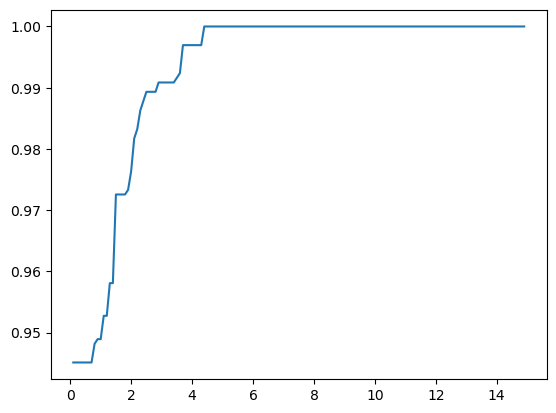

In [50]:
model = load_model('WiFi_5858_good.keras')
y_pred=model.predict(X_test)
yy_pred=[]
for yy in y_pred:
    yy_pred.append(np.where(yy==yy.max())[0][0])

yy_test=[]
for yy in y_test:
    yy_test.append(np.where(yy==yy.max())[0][0])

position_pred = []
for yy in yy_pred:
    position_pred.append(database[database['Label']==yy]['Position'].iloc[0][0:2])

position_test = []
for yy in yy_test:
    position_test.append(database[database['Label']==yy]['Position'].iloc[0][0:2])

error = np.array(position_pred) - np.array(position_test)

error_distance = np.sqrt((error**2).sum()/len(yy_test))
print('Errorr distance',error_distance)


dis = np.sqrt((error**2).sum(axis = 1))


a = list(np.arange(0,15,0.1))
counts_wifi, bins = np.histogram(dis, bins=a)
cumulative_wifi = np.cumsum(counts_wifi).astype(np.float64)
cumulative_wifi /= cumulative_wifi[-1]

plt.plot(bins[1::], cumulative_wifi)

In [51]:
dis.mean()

0.10934970417337592

# Weighting

In [240]:
position_list = []
for label in database.Label.unique():
    position_list.append(np.array(database[database['Label'] ==label]['Position'].iloc[0][0:2]).reshape(1,-1))

position_list = np.array(position_list).reshape(43,2)

In [241]:
result_list = []
row = 58
colu = 58
memori = 10
covar = True
fft = True

for kkk in range(test_dataset.shape[0]):
            print(test_dataset.iloc[kkk])
        
            result = {}   
        
        
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image1'])
            img = img.resize((row, colu))#重构图像大小
            Xi = img_to_array(img)/255
            Xi = Xi.reshape(-1, row, colu, 3)
            Xi= Xi.astype('float32')     
            
 
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image2'])
            img = img.resize((row, colu))#重构图像大小
            Xi1 = img_to_array(img)/255
            Xi1 = Xi1.reshape(-1, row, colu, 3)
            Xi1= Xi1.astype('float32')
            
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image3'])
            img = img.resize((row, colu))#重构图像大小
            Xi2 = img_to_array(img)/255
            Xi2 = Xi2.reshape(-1, row, colu, 3)
            Xi2 = Xi2.astype('float32')
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image4'])
            img = img.resize((row, colu))#重构图像大小
            Xi3 = img_to_array(img)/255
            Xi3 = Xi3.reshape(-1, row, colu, 3)
            Xi3 = Xi3.astype('float32')
            
            
            sample = pd.read_pickle(folder_path+test_dataset.iloc[kkk]['wifi'])
            sample_t = sample.copy()
############################################################################################################
            X = np.array(sample).reshape(-1,memori,sample.shape[1],1)
      
##############

            X_e = np.zeros([X.shape[0],58,58,1])
            for k, x in enumerate(X):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:X.shape[2],0]  = x[:,:,0]


                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 
###################
    
    
    

            if covar == True:
                    X_covar = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],1])
                    for k, x in enumerate(X_e):
                        X_covar[k,:,:,0]  = x[:,:,0].T@x[:,:,0]
                        X_covar[k,:,:,0] = (X_covar[k,:,:,0]-X_covar[k,:,:,0].min())*255/(X_covar[k,:,:,0].max()-X_covar[k,:,:,0].min())


            if fft == True:
                X_fft = np.zeros([X_e.shape[0],X_e.shape[1],X_e.shape[2],2])

                for k, x in enumerate(X_e):

                        f = np.fft.fft2(x[:,:,0])
                        fshift = np.fft.fftshift(f)

                                
                        X_fft[k,:,:,0] = (np.real(fshift)-np.real(fshift).min())*255/(np.real(fshift).max()-np.real(fshift).min())
                        X_fft[k,:,:,1] = (np.imag(fshift)-np.imag(fshift).min())*255/(np.imag(fshift).max()-np.imag(fshift).min())

##########################################
       
#####################################################
# RSSI image

            for c in sample.columns:
                 sample[c] = sample[c]*database[c].std()+database[c].mean() 

            Xt = np.array(sample).reshape(-1,memori,sample.shape[1],1)*255/70       

 
            for k, x in enumerate(Xt):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:Xt.shape[2],0]  = x[:,:,0]

                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 

#####################################################
        
        
        
            XX = np.zeros([X.shape[0],58,58,4])
            XX[:,0:X_e.shape[1],0:X_e.shape[2],0] = X_e[:,:,:,0]
            XX[:,0:X_e.shape[1],0:X_e.shape[2],1:3] =  X_fft            
            XX[:,0:X_e.shape[1],0:X_e.shape[2],3] =  X_covar[:,:,:,0]

                
            X_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],16])
            X_all[:,:,:,0:4]  = XX
            X_all[:,:,:,4:7] = Xi
            X_all[:,:,:,7:10] = Xi1
            X_all[:,:,:,10:13] = Xi2
            X_all[:,:,:,13::] = Xi3
            
          

            
            X_wifi_image =  X_all
            X_wifi =  X_all[:,:,:,0:4]
            
            
            
            XX_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],12])
            XX_all[:,:,:,0:3]  = Xi
            XX_all[:,:,:,3:6]  = Xi1
            XX_all[:,:,:,6:9]  = Xi2
            XX_all[:,:,:,9::]  = Xi3
            
            X_image =  XX_all
            
       
            
            
############################################################################################################            
            print('Computing')
            model = load_model('WiFi_5858_good.keras')
            y_pred=model.predict(X_wifi/255)
            
####################################################################### 
  
    
    
            K_best = 4
            gamma = np.array(heapq.nlargest(K_best,y_pred.reshape(-1))).min()

            while (gamma==0):
                K_best = K_best - 1
                gamma = np.array(heapq.nlargest(K_best,y_pred.reshape(-1))).min()


            mask = (y_pred >= gamma).astype('int')*y_pred

            y_pred_p = mask@position_list/mask.sum()   
    
     
            result = {}
            
            result['Method'] = 'WiFi-Image'
            
            result['Pred_label'] = np.where(y_pred[0]==y_pred[0].max())[0][0]
            
            result['Pred_position'] = y_pred_p

            result['True_label'] = test_dataset.iloc[kkk]['Label']
            
            result['True_position'] = test_dataset.iloc[kkk]['position']
            
            result['Error distance'] = np.sqrt(((np.array(result['Pred_position']) - np.array(result['True_position']))**2).sum())
            
            result_list.append(result)         

result_list = pd.DataFrame(result_list) 

image1      20240930152712-image1-[-0.17733072 -0.63474969...
image2      20240930152712-image2-[-0.17733072 -0.63474969...
image3      20240930152712-image3-[-0.17733072 -0.63474969...
image4      20240930152712-image4-[-0.17733072 -0.63474969...
wifi        20240930152712-wifi-[-0.17733072 -0.63474969 5...
position                           [-0.17733072, -0.63474969]
Label                                                      12
Name: 0, dtype: object
Computing
1/1 [==============================] - 0s 67ms/step
image1      20240930153053-image1-[-0.22739151 -0.62798392...
image2      20240930153053-image2-[-0.22739151 -0.62798392...
image3      20240930153053-image3-[-0.22739151 -0.62798392...
image4      20240930153053-image4-[-0.22739151 -0.62798392...
wifi        20240930153053-wifi-[-0.22739151 -0.62798392 8...
position                           [-0.22739151, -0.62798392]
Label                                                      12
Name: 1, dtype: object
Computing
1/1 [=========

1/1 [==============================] - 0s 47ms/step
image1      20240930163235-image1-[-1.39408023 -4.97443535...
image2      20240930163235-image2-[-1.39408023 -4.97443535...
image3      20240930163235-image3-[-1.39408023 -4.97443535...
image4      20240930163235-image4-[-1.39408023 -4.97443535...
wifi        20240930163235-wifi-[-1.39408023 -4.97443535 1...
position                           [-1.39408023, -4.97443535]
Label                                                      29
Name: 16, dtype: object
Computing
1/1 [==============================] - 0s 60ms/step
image1      20240930163523-image1-[  -2.80235044   -6.4488...
image2      20240930163523-image2-[  -2.80235044   -6.4488...
image3      20240930163523-image3-[  -2.80235044   -6.4488...
image4      20240930163523-image4-[  -2.80235044   -6.4488...
wifi        20240930163523-wifi-[  -2.80235044   -6.448832...
position                           [-2.80235044, -6.44883286]
Label                                                   

1/1 [==============================] - 0s 64ms/step
image1      20240930172308-image1-[ -2.00582494 -14.761394...
image2      20240930172308-image2-[ -2.00582494 -14.761394...
image3      20240930172308-image3-[ -2.00582494 -14.761394...
image4      20240930172308-image4-[ -2.00582494 -14.761394...
wifi        20240930172308-wifi-[ -2.00582494 -14.76139446...
position                          [-2.00582494, -14.76139446]
Label                                                       3
Name: 32, dtype: object
Computing
1/1 [==============================] - 0s 57ms/step
image1      20240930172833-image1-[  -7.46002893   -6.8853...
image2      20240930172833-image2-[  -7.46002893   -6.8853...
image3      20240930172833-image3-[  -7.46002893   -6.8853...
image4      20240930172833-image4-[  -7.46002893   -6.8853...
wifi        20240930172833-wifi-[  -7.46002893   -6.885383...
position                           [-7.46002893, -6.88538319]
Label                                                   

In [242]:
np.sqrt((result_list['Error distance']**2).mean())

1.9431223072667585

# Constant component of FFT

In [243]:
col=list(database.columns)
col.remove('Unified Position')
col.remove('Position')
col.remove('Position No.')

XXX = database[col]

In [244]:
XXX_normalized = XXX.copy() 
for c in XXX_normalized.columns:
     if c != 'Label':
        XXX_normalized[c] = (XXX_normalized[c]-XXX_normalized[c].mean())/XXX_normalized[c].std()

In [245]:
XXX_mean = XXX.groupby(by=['Label']).mean()
XXX_mean = XXX_mean.reset_index()
XXX_mean= XXX_mean.drop(columns = 'Label')

In [246]:
XXX_mean = XXX_normalized.groupby(by=['Label']).mean()
XXX_mean = XXX_mean.reset_index()
XXX_mean= XXX_mean.drop(columns = 'Label')

In [247]:
result_list = []
row = 58
colu = 58
memori = 10
covar = True
fft = True

for kkk in range(test_dataset.shape[0]):
            print(test_dataset.iloc[kkk])
        
            result = {}   
        
        
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image1'])
            img = img.resize((row, colu))#重构图像大小
            Xi = img_to_array(img)/255
            Xi = Xi.reshape(-1, row, colu, 3)
            Xi= Xi.astype('float32')     
            
 
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image2'])
            img = img.resize((row, colu))#重构图像大小
            Xi1 = img_to_array(img)/255
            Xi1 = Xi1.reshape(-1, row, colu, 3)
            Xi1= Xi1.astype('float32')
            
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image3'])
            img = img.resize((row, colu))#重构图像大小
            Xi2 = img_to_array(img)/255
            Xi2 = Xi2.reshape(-1, row, colu, 3)
            Xi2 = Xi2.astype('float32')
            
            img = Image.open(folder_path+test_dataset.iloc[kkk]['image4'])
            img = img.resize((row, colu))#重构图像大小
            Xi3 = img_to_array(img)/255
            Xi3 = Xi3.reshape(-1, row, colu, 3)
            Xi3 = Xi3.astype('float32')
            
            
            sample = pd.read_pickle(folder_path+test_dataset.iloc[kkk]['wifi'])
            sample_t = sample.copy()
############################################################################################################
            X = np.array(sample).reshape(-1,memori,sample.shape[1],1)
      
##############

            X_e = np.zeros([X.shape[0],58,58,1])
            for k, x in enumerate(X):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:X.shape[2],0]  = x[:,:,0]


                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 
###################
    
    
    

            if covar == True:
                    X_covar = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],1])
                    for k, x in enumerate(X_e):
                        X_covar[k,:,:,0]  = x[:,:,0].T@x[:,:,0]
                        X_covar[k,:,:,0] = (X_covar[k,:,:,0]-X_covar[k,:,:,0].min())*255/(X_covar[k,:,:,0].max()-X_covar[k,:,:,0].min())


            if fft == True:
                X_fft = np.zeros([X_e.shape[0],X_e.shape[1],X_e.shape[2],2])

                for k, x in enumerate(X_e):

                        f = np.fft.fft2(x[:,:,0])
                        fshift = np.fft.fftshift(f)

                                
                        X_fft[k,:,:,0] = (np.real(fshift)-np.real(fshift).min())*255/(np.real(fshift).max()-np.real(fshift).min())
                        X_fft[k,:,:,1] = (np.imag(fshift)-np.imag(fshift).min())*255/(np.imag(fshift).max()-np.imag(fshift).min())

##########################################
         
            
#####################################################
# RSSI image

            for c in sample.columns:
                 sample[c] = sample[c]*database[c].std()+database[c].mean() 

            Xt = np.array(sample).reshape(-1,memori,sample.shape[1],1)*255/70       

 
            for k, x in enumerate(Xt):
                    for kk in range(5):
                        X_e[k,memori*kk:memori*(kk+1),0:Xt.shape[2],0]  = x[:,:,0]

                    X_e[k,memori*5::,0:X.shape[2],0]  = x[0:8,:,0] 

#####################################################
        
        
        
            XX = np.zeros([X.shape[0],58,58,4])
            XX[:,0:X_e.shape[1],0:X_e.shape[2],0] = X_e[:,:,:,0]
            XX[:,0:X_e.shape[1],0:X_e.shape[2],1:3] =  X_fft            
            XX[:,0:X_e.shape[1],0:X_e.shape[2],3] =  X_covar[:,:,:,0]

                
            X_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],16])
            X_all[:,:,:,0:4]  = XX
            X_all[:,:,:,4:7] = Xi
            X_all[:,:,:,7:10] = Xi1
            X_all[:,:,:,10:13] = Xi2
            X_all[:,:,:,13::] = Xi3
            
          

            
            X_wifi_image =  X_all
            X_wifi =  X_all[:,:,:,0:4]
            
            
            
            XX_all = np.zeros([X_e.shape[0],X_e.shape[2],X_e.shape[2],12])
            XX_all[:,:,:,0:3]  = Xi
            XX_all[:,:,:,3:6]  = Xi1
            XX_all[:,:,:,6:9]  = Xi2
            XX_all[:,:,:,9::]  = Xi3
            
            X_image =  XX_all
            
####################################################################### 
            diff = XXX_mean - sample_t.mean()
            dis = np.sqrt((diff**2).sum(axis = 1))
            prob = 1/dis #1/(dis-0.9999*dis.min())
            prob = prob/prob.sum()            
    
#######################################################################               
            
            
############################################################################################################            
            print('Computing')
            model = load_model('WiFi_5858_good.keras')
            y_pred=model.predict(X_wifi/255)
            
####################################################################### 
            y_pred = (prob.values.reshape(-1,43)*y_pred)**0.5/((prob.values.reshape(-1,43)*y_pred)**0.5).sum()
    
    
#             K_best = 4
#             gamma = np.array(heapq.nlargest(K_best,y_pred.reshape(-1))).min()

#             while (gamma==0):
#                 K_best = K_best - 1
#                 gamma = np.array(heapq.nlargest(K_best,y_pred.reshape(-1))).min()


#             mask = (y_pred >= gamma).astype('int')*y_pred

#             y_pred_p = mask@position_list/mask.sum()       
    
    
    
    
     
            result = {}
            
            result['Method'] = 'WiFi-Image'
            
            result['Pred_label'] = np.where(y_pred[0]==y_pred[0].max())[0][0]
            
            result['Pred_position'] = database[database['Label']==np.where(y_pred[0]==y_pred[0].max())[0][0]]['Position'].iloc[0][0:2]

            result['True_label'] = test_dataset.iloc[kkk]['Label']
            
            result['True_position'] = test_dataset.iloc[kkk]['position']
            
            result['Error distance'] = np.sqrt(((np.array(result['Pred_position']) - np.array(result['True_position']))**2).sum())
            
            result_list.append(result)         

result_list = pd.DataFrame(result_list) 

image1      20240930152712-image1-[-0.17733072 -0.63474969...
image2      20240930152712-image2-[-0.17733072 -0.63474969...
image3      20240930152712-image3-[-0.17733072 -0.63474969...
image4      20240930152712-image4-[-0.17733072 -0.63474969...
wifi        20240930152712-wifi-[-0.17733072 -0.63474969 5...
position                           [-0.17733072, -0.63474969]
Label                                                      12
Name: 0, dtype: object
Computing
1/1 [==============================] - 0s 65ms/step
image1      20240930153053-image1-[-0.22739151 -0.62798392...
image2      20240930153053-image2-[-0.22739151 -0.62798392...
image3      20240930153053-image3-[-0.22739151 -0.62798392...
image4      20240930153053-image4-[-0.22739151 -0.62798392...
wifi        20240930153053-wifi-[-0.22739151 -0.62798392 8...
position                           [-0.22739151, -0.62798392]
Label                                                      12
Name: 1, dtype: object
Computing
1/1 [=========

1/1 [==============================] - 0s 54ms/step
image1      20240930163235-image1-[-1.39408023 -4.97443535...
image2      20240930163235-image2-[-1.39408023 -4.97443535...
image3      20240930163235-image3-[-1.39408023 -4.97443535...
image4      20240930163235-image4-[-1.39408023 -4.97443535...
wifi        20240930163235-wifi-[-1.39408023 -4.97443535 1...
position                           [-1.39408023, -4.97443535]
Label                                                      29
Name: 16, dtype: object
Computing
1/1 [==============================] - 0s 55ms/step
image1      20240930163523-image1-[  -2.80235044   -6.4488...
image2      20240930163523-image2-[  -2.80235044   -6.4488...
image3      20240930163523-image3-[  -2.80235044   -6.4488...
image4      20240930163523-image4-[  -2.80235044   -6.4488...
wifi        20240930163523-wifi-[  -2.80235044   -6.448832...
position                           [-2.80235044, -6.44883286]
Label                                                   

1/1 [==============================] - 0s 62ms/step
image1      20240930172308-image1-[ -2.00582494 -14.761394...
image2      20240930172308-image2-[ -2.00582494 -14.761394...
image3      20240930172308-image3-[ -2.00582494 -14.761394...
image4      20240930172308-image4-[ -2.00582494 -14.761394...
wifi        20240930172308-wifi-[ -2.00582494 -14.76139446...
position                          [-2.00582494, -14.76139446]
Label                                                       3
Name: 32, dtype: object
Computing
1/1 [==============================] - 0s 42ms/step
image1      20240930172833-image1-[  -7.46002893   -6.8853...
image2      20240930172833-image2-[  -7.46002893   -6.8853...
image3      20240930172833-image3-[  -7.46002893   -6.8853...
image4      20240930172833-image4-[  -7.46002893   -6.8853...
wifi        20240930172833-wifi-[  -7.46002893   -6.885383...
position                           [-7.46002893, -6.88538319]
Label                                                   

In [248]:
np.sqrt((result_list['Error distance']**2).mean())

2.414582556774375